In [91]:
from pyhht import EMD
import numpy as np
import pyleoclim as pyleo
import matplotlib.pyplot as plt
%matplotlib inline
from pyleoclim.utils import spectral

In [120]:
import warnings


In [121]:
warnings.filterwarnings('ignore')

In [42]:
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

# Linear trend

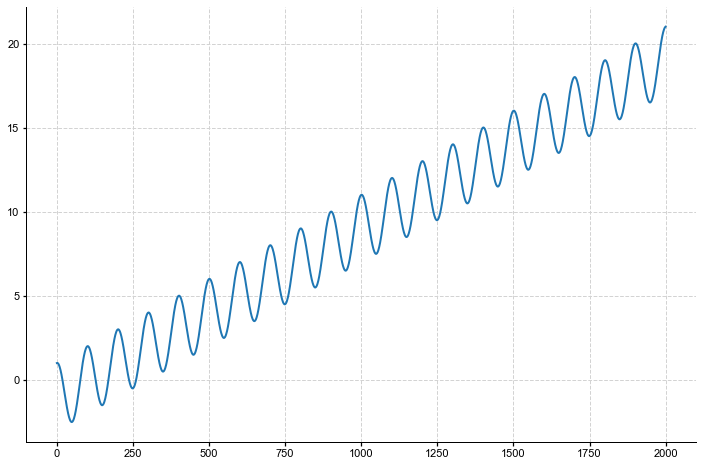

In [122]:
t = np.arange(2001)
f = 1/50
signal = 2*np.cos(np.pi*f*t)
slope = 0.01
intercept = -1
linear_trend = slope*t + intercept
signal_linear = signal+linear_trend
plt.figure(figsize=(12,8)) 
plt.plot(signal_linear)



# Linear Trend for Signal with noise

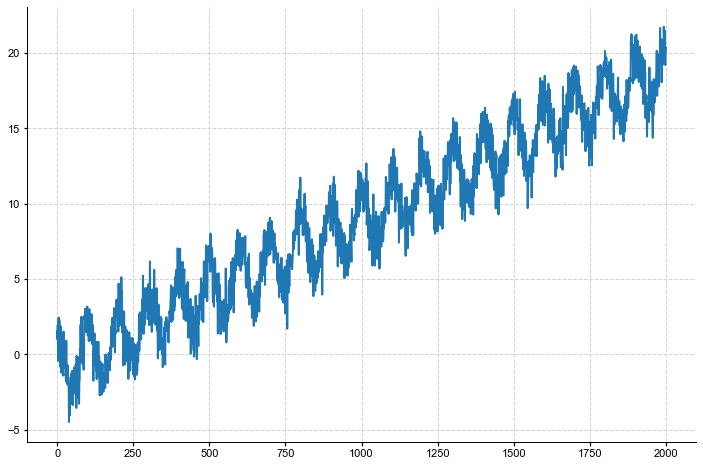

In [123]:
sig_var = np.var(signal)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal))
slope = 0.01
intercept = -1
signal_noise = signal+white_noise
linear_trend = slope*t + intercept
signal_linear_noise = signal_noise+linear_trend
plt.figure(figsize=(12,8))
plt.plot(signal_linear_noise)

# Decomposing using EMD

In [124]:
a =EMD(signal_linear).decompose()

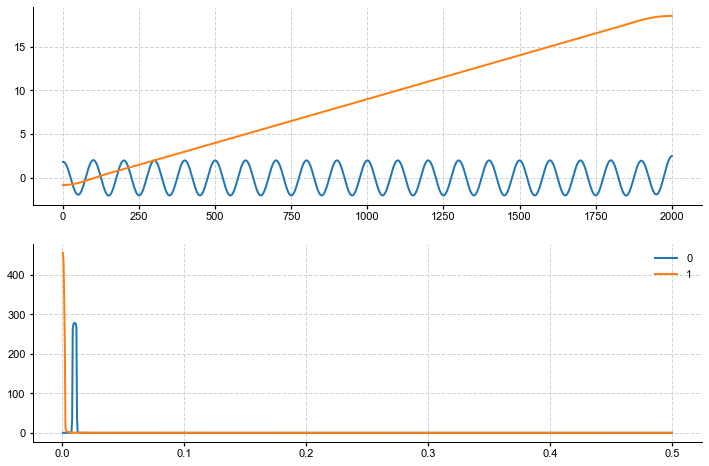

In [125]:
plt.figure(figsize=(12,8))
#plt.subplots(nrows=2,ncols=2)
for b,i in enumerate(a):
  
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
plt.legend()
plt.show()

In [131]:
d = EMD(signal_linear_noise).decompose()

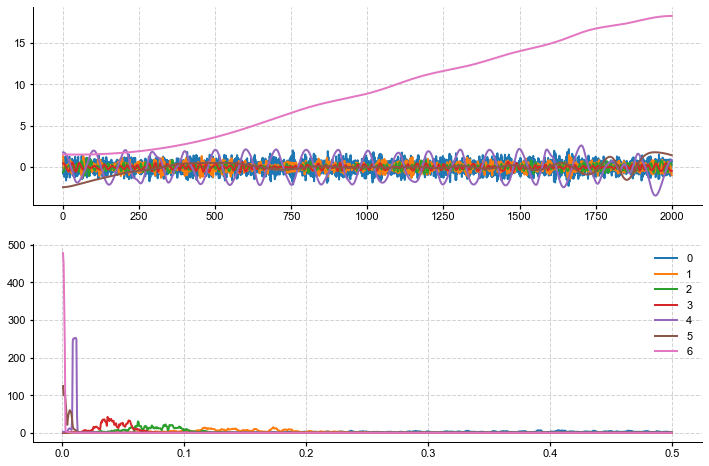

In [134]:
plt.figure(figsize=(12,8))
for b,i in enumerate(d):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
plt.legend()
plt.show()

# Non Linear Trend

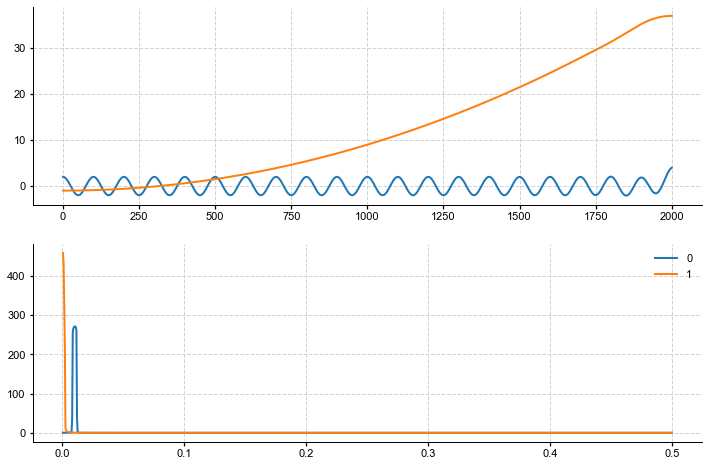

In [135]:
slope = 1e-5
intercept = -1
non_linear_trend = slope*t**2 + intercept
signal_non_linear = signal+non_linear_trend
d=EMD(signal_non_linear).decompose()
plt.figure(figsize=(12,8))
for b,i in enumerate(d):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    

plt.legend()

# Non Linear Trend for Noisy Signal

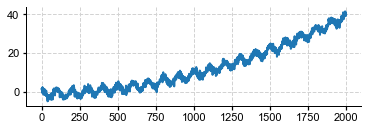

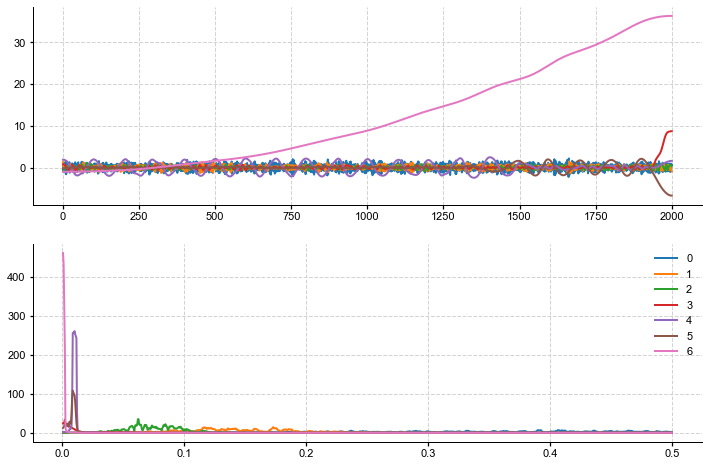

In [137]:
signal_non_linear_noisy_trend = signal_noise+non_linear_trend
plt.subplot(2,1,1)
plt.plot(signal_non_linear_noisy_trend)
d=EMD(signal_non_linear_noisy_trend).decompose()
plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
for b,i in enumerate(d):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
    
plt.legend()

# Cosine Trend

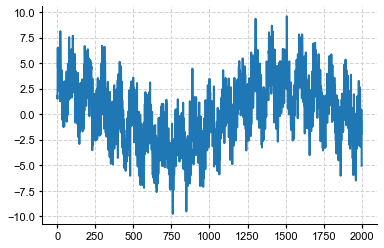

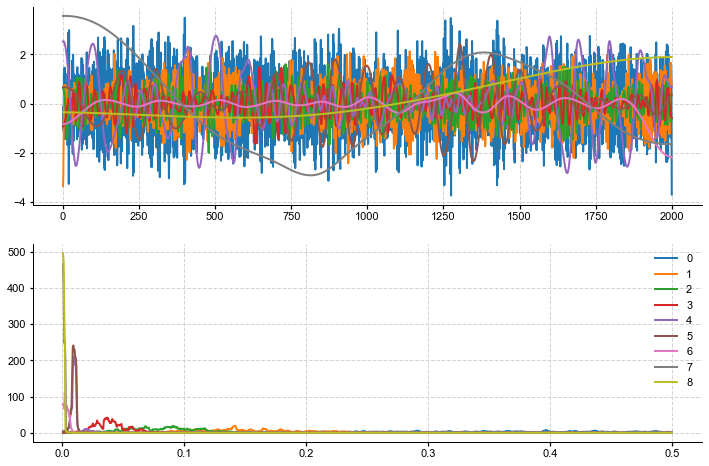

In [138]:
freq = 1/1500
signal2 = np.cos(2*np.pi*freq*t)
signal_cos = signal+3*signal2
sig_var = np.var(signal_cos)
noise_var = sig_var/ 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal_cos))
signal_cos = signal_cos+white_noise
plt.plot(signal_cos)
c=EMD(signal_cos).decompose()
plt.figure(figsize=(12,8))
for b,i in enumerate(c):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
plt.legend()

# S Shaped Trend

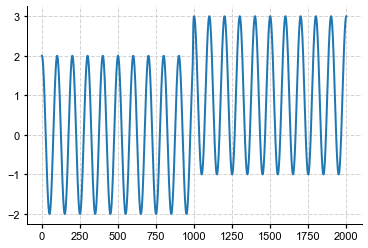

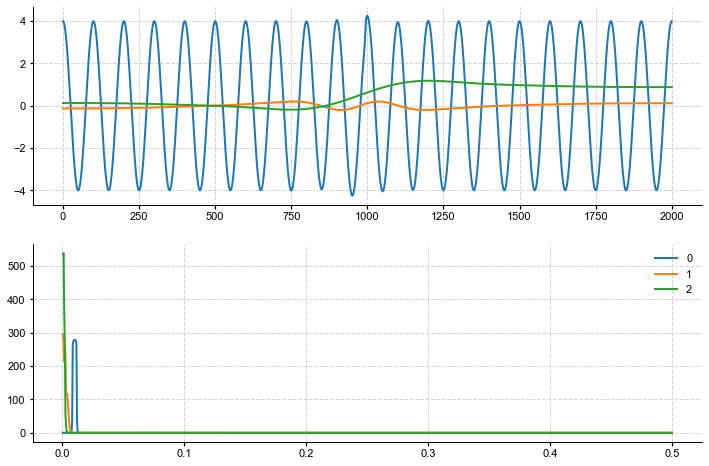

In [141]:
Y = t / ( t+ np.exp(1000-1*t)) 
signal_s = signal+Y
plt.plot(signal_s)
signal_s = signal+signal_s


d=EMD(signal_s).decompose()

plt.figure(figsize=[12,8])
for b,i in  enumerate(d):
    plt.subplot(2,1,1)
    plt.plot(i,label=b)
    res_dict =spectral.mtm(i,np.arange(len(i)))
    plt.subplot(2,1,2)
    plt.plot(res_dict['freq'],res_dict['psd'],label=b)
    
    
plt.legend()
